In [17]:
#pip install sweetviz


In [18]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
#Establish File Path - User Specific
file_path = r"RSV_data.csv"

In [20]:
#Read in CSV of interest USE FERRARI because data sets can be very long
df = pd.read_csv(file_path,  low_memory=False)

In [21]:
df.shape

(13806, 8)

In [22]:
df.columns.values

array(['state', 'season', 'week_ending_date', 'age_category', 'sex',
       'race', 'rate', 'cumulative_rate'], dtype=object)

In [23]:
# Finding all Categorical Variables
categorical_vars = []

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column data type is non-numeric
    if not pd.api.types.is_numeric_dtype(df[column]):
        categorical_vars.append(column)

print("Categorical variables:")
for var in categorical_vars:
    print(var)

Categorical variables:
state
season
week_ending_date
age_category
sex
race


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13806 entries, 0 to 13805
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state             13806 non-null  object 
 1   season            13806 non-null  object 
 2   week_ending_date  13806 non-null  object 
 3   age_category      13806 non-null  object 
 4   sex               13806 non-null  object 
 5   race              13806 non-null  object 
 6   rate              13806 non-null  float64
 7   cumulative_rate   13806 non-null  float64
dtypes: float64(2), object(6)
memory usage: 863.0+ KB


In [25]:
import pandas as pd

# Convert 'Appt Dttm' column to DateTime format
df['week_ending_date'] = pd.to_datetime(df['week_ending_date'])#, format= '%YYYY-MM-dd%') 
#df['week_ending_date'] = df['week_ending_date'].dt.date #

In [26]:
df['week_ending_date'].max()

Timestamp('2024-02-17 00:00:00')

In [27]:
#analyzing the dataset
df_analyzed = sv.analyze(df)


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [28]:
#display the report
df_analyzed.show_html('Radiology_EDA.html')

Report Radiology_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [29]:
df['age_category'].unique()

array(['5-17 years', '6mo-<12 months', '0-4 years', '0-<6 months',
       '1-<2 years', '0-17 years (Children)', '1-4 years', '0-<1 year',
       '12-17 years', '5-11 years', '2-4 years'], dtype=object)

Assessing hierarchal row relationships in data

In [30]:
#df.groupby('age_category')['rate'].mean().sort_values(ascending=False)
grouped_data = df.groupby('age_category').agg({
    'rate': 'mean',
    'age_category': 'size'  # Using 'age_category' here just to count rows
}).rename(columns={'age_category': 'row_count'}).reset_index()

# Sort by descending mean rate
grouped_data = grouped_data.sort_values(by='rate', ascending=False)
print(grouped_data)


             age_category       rate  row_count
3             0-<6 months  32.571447        767
2               0-<1 year  25.049153        767
10         6mo-<12 months  17.533507        767
5              1-<2 years  10.781226        767
1               0-4 years   9.364928        767
4               1-4 years   5.452412        767
7               2-4 years   3.749153        767
0   0-17 years (Children)   2.670160       6136
8              5-11 years   0.439374        767
9              5-17 years   0.284224        767
6             12-17 years   0.121773        767


In [31]:
filter = ['0-<1 year','1-4 years', '5-11 years', '12-17 years']

Filter to top level data

In [32]:
query_string = "(`age_category` in @filter)"

In [33]:
df = df.query(query_string)

In [34]:
df['age_category'].unique()


array(['1-4 years', '0-<1 year', '12-17 years', '5-11 years'],
      dtype=object)

In [35]:
#Dimension of the dataframe (rows x columns)
df.shape

(3068, 8)

DF Columns are in tact. Rows shortened.

In [36]:
# Finding Binary Variables
one_value_vars = []

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column has only two unique values
    unique_values = df[column].unique()
    if len(unique_values) < 2:
        one_value_vars.append(column)

print("Binary variables:")
for var in one_value_vars:
    print(var)

Binary variables:
sex
race


In [37]:
df.drop(columns = ['sex','race'], inplace=True)

In [38]:
df['week_ending_date'] = pd.to_datetime(df['week_ending_date'])

In [53]:
df['month_year'] = df['week_ending_date'].dt.strftime('%Y-%m')
df.head()

,state,season,week_ending_date,age_category,rate,cumulative_rate,month_year,week_number,month,year
9971,Minnesota,2022-23,2023-01-07,1-4 years,2.0,361.5,2023-01,1,1,2023
9972,Tennessee,2022-23,2023-01-07,1-4 years,3.4,74.4,2023-01,1,1,2023
9973,RSV-NET,2022-23,2023-01-07,1-4 years,5.2,315.1,2023-01,1,1,2023
9974,Colorado,2022-23,2023-01-07,1-4 years,13.1,768.1,2023-01,1,1,2023
9975,Michigan,2022-23,2023-01-07,1-4 years,6.0,408.7,2023-01,1,1,2023


In [54]:
avg_rate_by_month_year_age = df.groupby(['month_year', 'age_category'])['rate'].mean().reset_index()


In [55]:
avg_rate_by_month_year_age.head()

,month_year,age_category,rate
0,2023-01,0-<1 year,25.784615
1,2023-01,1-4 years,4.796154
2,2023-01,12-17 years,0.215385
3,2023-01,5-11 years,0.284615
4,2023-02,0-<1 year,10.728846


C:\Users\jeanne.chrisanthopou\AppData\Local\Temp\ipykernel_29752\2577720850.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=avg_rate_by_month_year_age, x='month_year', y='rate', hue='age_category', palette='Set2', linewidth=2.5, ci=None)


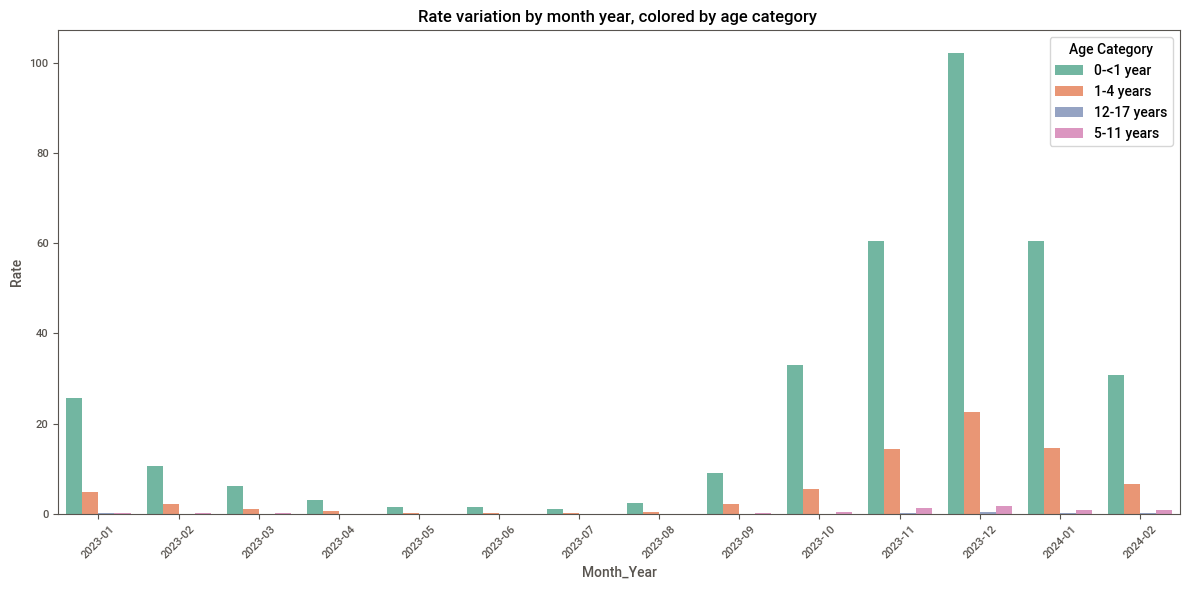

In [56]:
# Plotting
plt.figure(figsize=(12, 6))

sns.barplot(data=avg_rate_by_month_year_age, x='month_year', y='rate', hue='age_category', palette='Set2', linewidth=2.5, ci=None)

# Beautify the plot
plt.title('Rate variation by month year, colored by age category ')
plt.xlabel('Month_Year')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend(title='Age Category')

plt.tight_layout()
plt.show()

In [43]:
df['week_number'] = df['week_ending_date'].dt.isocalendar().week
df['month'] = df['week_ending_date'].dt.month

df.head()


,state,season,week_ending_date,age_category,rate,cumulative_rate,month_year,week_number,month
9971,Minnesota,2022-23,2023-01-07,1-4 years,2.0,361.5,2023YYY-01m,1,1
9972,Tennessee,2022-23,2023-01-07,1-4 years,3.4,74.4,2023YYY-01m,1,1
9973,RSV-NET,2022-23,2023-01-07,1-4 years,5.2,315.1,2023YYY-01m,1,1
9974,Colorado,2022-23,2023-01-07,1-4 years,13.1,768.1,2023YYY-01m,1,1
9975,Michigan,2022-23,2023-01-07,1-4 years,6.0,408.7,2023YYY-01m,1,1


In [44]:
# Extract year from 'week_ending_date'
df['year'] = df['week_ending_date'].dt.year

# Count the number of weeks in each year
weeks_per_year = df['year'].value_counts().sort_index()
# Print the result
print(weeks_per_year)

year
2023    2704
2024     364
Name: count, dtype: int64


In [45]:
#2024 has much less data. So lets visualize yoy
uniq_week_by_season = df.groupby('season')['week_number'].nunique().reset_index()
uniq_week_by_season


,season,week_number
0,2022-23,39
1,2023-24,20


In [46]:
common_week_numbers = set(df[df['season'] == '2022-23']['week_number']).intersection(set(df[df['season'] == '2023-24']['week_number']))

In [47]:
common_week_numbers

{1, 2, 3, 4, 5, 6, 7}

In [48]:
df_grouped_season = df.groupby(['month','week_number','season'])['rate'].mean().reset_index()
df_grouped_season

,month,week_number,season,rate
0,1,1,2022-23,10.076923
1,1,1,2023-24,30.123077
2,1,2,2022-23,8.398077
3,1,2,2023-24,17.869231
4,1,3,2022-23,6.855769
5,1,3,2023-24,15.176923
6,1,4,2022-23,5.750000
7,1,4,2023-24,13.161538
8,2,5,2022-23,3.219231
9,2,5,2023-24,11.782692


C:\Users\jeanne.chrisanthopou\AppData\Local\Temp\ipykernel_29752\1245567171.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_grouped_state_season, x='state', y='rate', hue='season', palette='Set1', linewidth=2.5, ci=None)


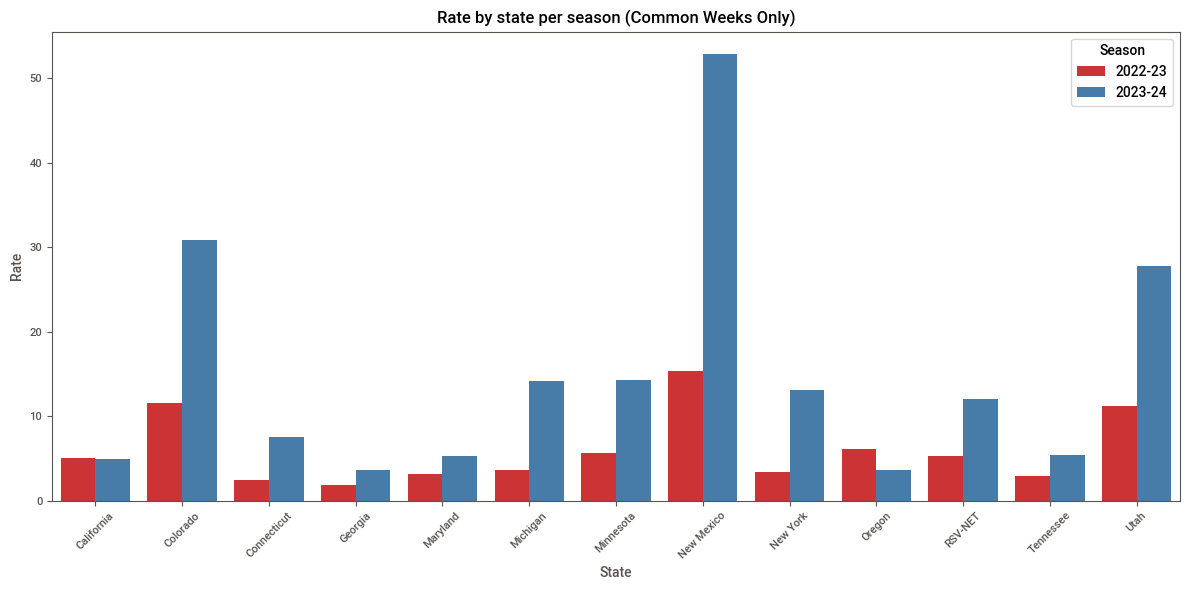

In [49]:
#filter to common week numbers
df_filtered = df[df['week_number'].isin(common_week_numbers)]

# Group by state and season to calculate mean rate
df_grouped_state_season = df_filtered.groupby(['state', 'season'])['rate'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

sns.barplot(data=df_grouped_state_season, x='state', y='rate', hue='season', palette='Set1', linewidth=2.5, ci=None)

# Beautify the plot
plt.title('Rate by state per season (Common Weeks Only)')
plt.xlabel('State')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend(title='Season')

plt.tight_layout()
plt.show()